## 1. Import libraries, test data and split into training/test data sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## 2. Apply Feature scaling

This is minimize the feature value so that it'll not only be easier to work with and the data prediction comes out more accurately.

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 3. Training the Naive Bayes model

In [3]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

## 4a. Tabulate decision boundary

In [4]:
x_train_inverse = sc.inverse_transform(x_train)
x_test_inverse = sc.inverse_transform(x_test)
y_prediction = model.predict(x_test)

# Imagine calculus riemann sum delta
x1_delta = 0.5
x2_delta = 5

x1_margin = 10
x2_margin = 1000

x1, x2 = np.meshgrid(
    np.arange(start=x_train_inverse[:, 0].min() - x1_margin, stop=x_train_inverse[:, 0].max() + x1_margin, step=x1_delta),
    np.arange(start=x_train_inverse[:, 1].min() - x2_margin, stop=x_train_inverse[:, 1].max() + x2_margin, step=x2_delta)
)
z = model.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape)

## 4b. Display graph and details

The dots represents the entire data set and their actual predicted class. Green represents class 1 and red represents class 0. The shaded areas of green and red are predicted areas that determines the data point classes. For test data, they are either circled with yellow (predicted 0) and cyan (predicted 1).

There is also the confusion matrix to get a sense of the accuracy for the test data.

Alpha:  1e-09 

Model dist. params:
          Feature 1 (mean)  Feature 1 (std)  Feature 2 (mean)  Feature 2 (std)
Class 0         -0.457403         0.600546         -0.272635         0.506958
Class 1          0.778822         0.717352          0.464217         1.497444 

Model prob.:
               Class 0  Class 1
Sample count   189.00   111.00
Prior prob.      0.63     0.37 

                Pred. Class 0  Pred. Class 1
Actual Class 0             65              3
Actual Class 1              7             25 

Accuracy score: 90.0%


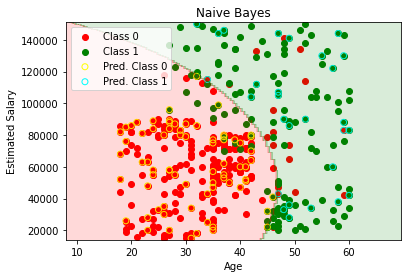

In [5]:
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score
from utils import split_into_classes

x_0, x_1 = split_into_classes(x, y)
x_test_0, x_test_1 = split_into_classes(x_test_inverse, y_prediction)

cm = confusion_matrix(y_test, y_prediction)
smoothing_var = model.get_params()["var_smoothing"]

print("Alpha: ", smoothing_var, "\n")
print('Model dist. params:\n', pd.DataFrame([
    [model.theta_[0][0], model.sigma_[0][0], model.theta_[0][1], model.sigma_[0][1]],
    [model.theta_[1][0], model.sigma_[1][0], model.theta_[1][1], model.sigma_[1][1]]
], columns=[
    'Feature 1 (mean)', 
    'Feature 1 (std)', 
    'Feature 2 (mean)', 
    'Feature 2 (std)'
], index=[
    'Class 0', 
    'Class 1'
]), '\n')

print('Model prob.:\n', pd.DataFrame([
    model.class_count_,
    model.class_prior_
], columns=[
    'Class 0',
    'Class 1'
], index=[
    'Sample count',
    'Prior prob.'
]), '\n')

print(pd.DataFrame(cm, columns=['Pred. Class 0', 'Pred. Class 1'], index=['Actual Class 0', 'Actual Class 1']), '\n')
print(f'Accuracy score: {accuracy_score(y_test, y_prediction) * 100}%')

plt.scatter(x_0['x'], x_0['y'], color='red', label='Class 0')
plt.scatter(x_1['x'], x_1['y'], color='green', label='Class 1')

plt.scatter(x_test_0['x'], x_test_0['y'], facecolors='none', edgecolors='yellow', label='Pred. Class 0')
plt.scatter(x_test_1['x'], x_test_1['y'], facecolors='none', edgecolors='cyan', label='Pred. Class 1')

plt.contourf(x1, x2, z, alpha = 0.15, cmap=ListedColormap(('red', 'green')))

plt.title('Naive Bayes')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()